# US Flight Exploratory Data Analysis(EDA)
## by Chaojun Cao

<a id='intro'></a>
### Preliminary Wrangling
This dataset reports flights in the United States,including carriers, arrival and departure delays, and reasons for delays,
from 2007 to 2008, around 7,751,000 flight records for 2007, and 8,450,121 for 2008. The full data are available from <a>http://stat-computing.org/dataexpo/2009/the-data.html</a>with more detailed variable descriptions.

### Exploratory

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load in the csv data
df1_clean=pd.read_csv('2008_sample_10k.csv')
df1_clean.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,8,27,3,1121.0,1100,1859.0,1856,US,1548,...,6.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,31,4,1104.0,1110,1219.0,1235,WN,351,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,3,27,4,557.0,600,800.0,810,NW,1722,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,10,11,6,928.0,930,1113.0,1125,DL,660,...,8.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,27,7,908.0,912,1019.0,1030,9E,2910,...,4.0,36.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
drop_list=['TailNum', 'AirTime', 'Distance','TaxiIn', 'TaxiOut',  'CancellationCode']
df1_clean=df1_clean.drop(drop_list, axis=1)

In [4]:
df1_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
column_label=['Year', 'Month', 'Day_of_Month', 'Day_Of_Week', 'Dep_Time', 'S_Dep_Time',
       'Arr_Time', 'S_Arr_Time', 'Unique_Carrier', 'Flight_Num',
       'Actual_Elapsed_Time','S_Elapsed_Time', 'Arr_Delay',
       'Dep_Delay', 'Origin', 'Dest', 
       'Cancelled',  'Diverted', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

In [6]:
df1_clean.columns=column_label
df1_clean.rename(columns=lambda x:x.lower(), inplace=True)

In [7]:
df1_clean.head(2)

,year,month,day_of_month,day_of_week,dep_time,s_dep_time,arr_time,s_arr_time,unique_carrier,flight_num,...,dep_delay,origin,dest,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,8,27,3,1121.0,1100,1859.0,1856,US,1548,...,21.0,SEA,CLT,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,31,4,1104.0,1110,1219.0,1235,WN,351,...,-6.0,OAK,SAN,0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
time_col=['dep_time', 's_dep_time', 'arr_time', 's_arr_time']

In [9]:
time_columns=df1_clean.loc[:,time_col]
time_columns.fillna('999999', inplace=True)
time_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
dep_time      10000 non-null object
s_dep_time    10000 non-null int64
arr_time      10000 non-null object
s_arr_time    10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [10]:
#for the time columns, change the column format to hh:mm
time_columns=time_columns.astype(str)
time_columns['dep_time']=time_columns['dep_time'].apply(lambda x: x.zfill(6))
time_columns['arr_time']=time_columns['arr_time'].apply(lambda x: x.zfill(6))
time_columns['s_dep_time']=time_columns['s_dep_time'].apply(lambda x: x.zfill(4))
time_columns['s_arr_time']=time_columns['s_arr_time'].apply(lambda x: x.zfill(4))

In [11]:
list1=[]
list2=[]
list3=[]
list4=[]
for i in range(0, time_columns.shape[0]):
    list1.append(time_columns.dep_time[i][0:2]+':'+time_columns.dep_time[i][2:4])
    list2.append(time_columns.arr_time[i][0:2]+':'+time_columns.arr_time[i][2:4])
    list3.append(time_columns.s_dep_time[i][0:2]+':'+time_columns.s_dep_time[i][2:4])
    list4.append(time_columns.s_arr_time[i][0:2]+':'+time_columns.s_arr_time[i][2:4])

In [12]:
len(list1), len(list2), len(list3), len(list4)

(10000, 10000, 10000, 10000)

In [13]:
df1_clean['depart_time']=list1
df1_clean['arrive_time']=list2
df1_clean['schedule_dep_time']=list3
df1_clean['schedule_arr_time']=list4

In [14]:
df1_clean.drop(['dep_time', 's_dep_time', 'arr_time', 's_arr_time'], axis=1, inplace=True)

df1_clean.loc[df1_clean.depart_time=='99:99', 'depart_time']=np.nan
df1_clean.loc[df1_clean.arrive_time=='99:99', 'arrive_time']=np.nan

In [15]:
# melt the delay reseasons to one column, it will gain some number of rows for some flights have several delay reasons.
df1_melt=df1_clean[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
df1_melt.replace(0.0, np.nan, inplace=True)
df1_melt['total']=df1_melt.sum(axis=1)
df1_melt=df1_melt.reset_index()
df1_melt.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
0,0,NaN,NaN,NaN,NaN,NaN,0.0
1,1,NaN,NaN,NaN,NaN,NaN,0.0
2,2,NaN,NaN,NaN,NaN,NaN,0.0
3,3,NaN,NaN,NaN,NaN,NaN,0.0
4,4,NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
df1_melt.tail()

,index,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
9995,9995,10.0,NaN,10.0,NaN,5.0,25.0
9996,9996,NaN,NaN,NaN,NaN,NaN,0.0
9997,9997,NaN,NaN,NaN,NaN,NaN,0.0
9998,9998,NaN,NaN,NaN,NaN,NaN,0.0
9999,9999,NaN,NaN,NaN,NaN,NaN,0.0


In [17]:
df1_melt.describe()

,index,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
count,10000.00000,944.000000,149.000000,1301.000000,5.000000,964.000000,10000.000000
mean,4999.50000,34.804025,51.120805,29.478862,21.200000,47.430498,12.465300
std,2886.89568,52.049804,67.687069,39.200065,24.783059,52.465291,36.631123
min,0.00000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000
25%,2499.75000,8.000000,14.000000,9.000000,7.000000,17.000000,0.000000
50%,4999.50000,18.000000,31.000000,18.000000,13.000000,30.000000,0.000000
75%,7499.25000,40.000000,61.000000,31.000000,15.000000,58.000000,0.000000
max,9999.00000,832.000000,533.000000,385.000000,65.000000,686.000000,934.000000


In [18]:
df1_melt.loc[df1_melt.total==0.0, ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]=8888
df1_melt.head()

,index,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
0,0,8888.0,8888.0,8888.0,8888.0,8888.0,0.0
1,1,8888.0,8888.0,8888.0,8888.0,8888.0,0.0
2,2,8888.0,8888.0,8888.0,8888.0,8888.0,0.0
3,3,8888.0,8888.0,8888.0,8888.0,8888.0,0.0
4,4,8888.0,8888.0,8888.0,8888.0,8888.0,0.0


In [19]:
df1_melt=pd.melt(df1_melt, id_vars=['index','total'], var_name='delay_cause', value_name='delay_minute')
df1_melt.head()

,index,total,delay_cause,delay_minute
0,0,0.0,carrier_delay,8888.0
1,1,0.0,carrier_delay,8888.0
2,2,0.0,carrier_delay,8888.0
3,3,0.0,carrier_delay,8888.0
4,4,0.0,carrier_delay,8888.0


In [20]:
df1_melt=df1_melt[df1_melt.delay_minute.notnull()]
df1_melt.loc[df1_melt.delay_minute==8888, 'delay_cause']=np.nan

In [21]:
df1_melt=df1_melt.drop_duplicates()
df1_melt=df1_melt.reset_index(drop=True)
df1_melt.head()

,index,total,delay_cause,delay_minute
0,0,0.0,NaN,8888.0
1,1,0.0,NaN,8888.0
2,2,0.0,NaN,8888.0
3,3,0.0,NaN,8888.0
4,4,0.0,NaN,8888.0


In [22]:
df1_melt.shape

(11226, 4)

In [23]:
dup_index=df1_melt[df1_melt['index'].duplicated()]['index']

In [24]:
df1_melt.loc[dup_index, :].head()

,index,total,delay_cause,delay_minute
1626,1860,0.0,NaN,8888.0
1831,2102,0.0,NaN,8888.0
4783,5438,0.0,NaN,8888.0
5955,6746,28.0,carrier_delay,26.0
6220,7057,0.0,NaN,8888.0


In [25]:
df1_melt.describe()

,index,total,delay_minute
count,11226.000000,11226.000000,11226.000000
mean,4975.733030,18.587208,6236.504276
std,2886.106361,44.171195,4054.623266
min,0.000000,0.000000,1.000000
25%,2467.250000,0.000000,61.000000
50%,4970.500000,0.000000,8888.000000
75%,7474.750000,20.000000,8888.000000
max,9999.000000,934.000000,8888.000000


In [26]:
df1_clean.reset_index(inplace=True)
df1_clean.tail()

,index,year,month,day_of_month,day_of_week,unique_carrier,flight_num,actual_elapsed_time,s_elapsed_time,arr_delay,...,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,depart_time,arrive_time,schedule_dep_time,schedule_arr_time
9995,9995,2008,5,18,7,WN,1918,135.0,125.0,25.0,...,0,10.0,0.0,10.0,0.0,5.0,08:10,09:25,07:55,09:00
9996,9996,2008,2,27,3,XE,2406,54.0,65.0,-11.0,...,0,NaN,NaN,NaN,NaN,NaN,16:00,16:54,16:00,17:05
9997,9997,2008,5,16,5,WN,2792,137.0,155.0,-18.0,...,0,NaN,NaN,NaN,NaN,NaN,06:25,07:42,06:25,08:00
9998,9998,2008,5,1,4,B6,1061,249.0,244.0,-3.0,...,0,NaN,NaN,NaN,NaN,NaN,09:12,12:21,09:20,12:24
9999,9999,2008,8,11,1,WN,439,73.0,75.0,4.0,...,0,NaN,NaN,NaN,NaN,NaN,12:41,13:54,12:35,13:50


In [27]:
df1_melt.tail()

,index,total,delay_cause,delay_minute
11221,9968,112.0,late_aircraft_delay,99.0
11222,9972,291.0,late_aircraft_delay,19.0
11223,9976,76.0,late_aircraft_delay,76.0
11224,9989,17.0,late_aircraft_delay,17.0
11225,9995,25.0,late_aircraft_delay,5.0


In [28]:
df1_clean=pd.merge(df1_clean, df1_melt, on='index', how='inner')
df1_clean.head()

,index,year,month,day_of_month,day_of_week,unique_carrier,flight_num,actual_elapsed_time,s_elapsed_time,arr_delay,...,nas_delay,security_delay,late_aircraft_delay,depart_time,arrive_time,schedule_dep_time,schedule_arr_time,total,delay_cause,delay_minute
0,0,2008,8,27,3,US,1548,278.0,296.0,3.0,...,NaN,NaN,NaN,11:21,18:59,11:00,18:56,0.0,NaN,8888.0
1,1,2008,1,31,4,WN,351,75.0,85.0,-16.0,...,NaN,NaN,NaN,11:04,12:19,11:10,12:35,0.0,NaN,8888.0
2,2,2008,3,27,4,NW,1722,63.0,70.0,-10.0,...,NaN,NaN,NaN,05:57,08:00,06:00,08:10,0.0,NaN,8888.0
3,3,2008,10,11,6,DL,660,105.0,115.0,-12.0,...,NaN,NaN,NaN,09:28,11:13,09:30,11:25,0.0,NaN,8888.0
4,4,2008,1,27,7,9E,2910,131.0,138.0,-11.0,...,NaN,NaN,NaN,09:08,10:19,09:12,10:30,0.0,NaN,8888.0


In [29]:
df1_clean.loc[df1_clean.delay_minute==8888.0, 'delay_minute']=np.nan

In [30]:
df1_clean.shape

(11226, 27)

In [31]:
df1_clean.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1, inplace=True)
df1_clean.delay_minute.replace(8888.0, np.nan, inplace=True)
df1_clean.rename(columns={'total':'total_delay'}, inplace=True)

In [32]:
conv_to_str=['index','year','day_of_month','flight_num']
conv_to_cat=['cancelled', 'diverted','month','day_of_week']

for col in conv_to_str:
    df1_clean[col]=df1_clean[col].astype(str)
    
for col in conv_to_cat:
    df1_clean[col]=df1_clean[col].astype('category')


In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11226 entries, 0 to 11225
Data columns (total 22 columns):
index                  11226 non-null object
year                   11226 non-null object
month                  11226 non-null category
day_of_month           11226 non-null object
day_of_week            11226 non-null category
unique_carrier         11226 non-null object
flight_num             11226 non-null object
actual_elapsed_time    11007 non-null float64
s_elapsed_time         11226 non-null float64
arr_delay              11007 non-null float64
dep_delay              11030 non-null float64
origin                 11226 non-null object
dest                   11226 non-null object
cancelled              11226 non-null category
diverted               11226 non-null category
depart_time            11030 non-null object
arrive_time            11009 non-null object
schedule_dep_time      11226 non-null object
schedule_arr_time      11226 non-null object
total_delay            1

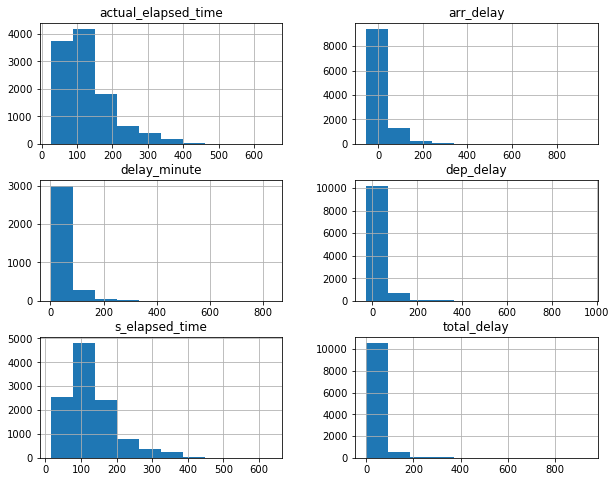

In [34]:
df1_clean.hist(figsize=(10,8));

### What is the structure of your dataset?

There are 100,000 flights records in the dataset with 29 features. After some data wrangling process, I have 22 variables in the data which may be helpful later, 4 category variables, 6 floats, and 12 strings. Month, day_of_month, day_of_week, cancelled, diverted, they can be either string or category, depart_time, schedule_dep_time, arrive_time, schedule_arr_time, since I don't need further timing calculation from them, I formatted them as hh:mm with string type. All the time measurement columns are float with unit minutes. 

### What is/are the main feature(s) of interest in your dataset?

When taking flights, my concerns were always about the flight would delay or not. So here, I am very interested in the reasons and causes of delay status, also, the delay situation from different locations and all the carriers. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For the causes and reasons that lead a flight to delay, I think may roughly divided to two groups: natural causes that are not controllable, business strategy that are affected by human operations. The data summarized 5 aspects that causes delay:carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, and we also have the records for each carrier. I am sure those variables will give us good pictures of the delay status.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: arrive delay.

In [35]:
df1_clean.arr_delay.describe()

count    11007.000000
mean        15.019806
std         46.980395
min        -54.000000
25%         -9.000000
50%          0.000000
75%         21.000000
max        934.000000
Name: arr_delay, dtype: float64

In [36]:
df1_clean.arr_delay.isnull().sum()

219

In [37]:
df1_clean.columns

Index(['index', 'year', 'month', 'day_of_month', 'day_of_week',
       'unique_carrier', 'flight_num', 'actual_elapsed_time', 's_elapsed_time',
       'arr_delay', 'dep_delay', 'origin', 'dest', 'cancelled', 'diverted',
       'depart_time', 'arrive_time', 'schedule_dep_time', 'schedule_arr_time',
       'total_delay', 'delay_cause', 'delay_minute'],
      dtype='object')

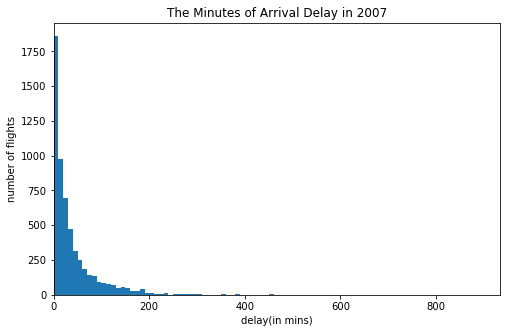

In [38]:
bins = np.arange(0, df1_clean['arr_delay'].max()+10,10)

plt.figure(figsize=[8, 5])
plt.hist(data = df1_clean, x = 'arr_delay', bins = bins)
plt.title('The Minutes of Arrival Delay in 2007')
plt.xlim(0,934)
plt.xlabel('delay(in mins)')
plt.ylabel('number of flights')
plt.show()

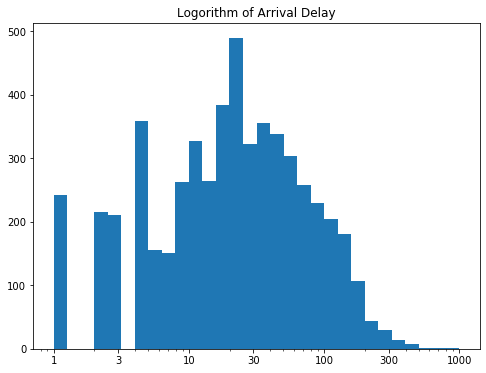

In [39]:
bin_edges = 10 ** np.arange(0, np.log10(df1_clean.arr_delay.max())+0.1, 0.1);
plt.figure(figsize=(8,6));
plt.hist(data=df1_clean, x='arr_delay', bins = bin_edges);
plt.title('Logorithm of Arrival Delay')
plt.xscale('log');
tick_locs = [1,3,10, 30, 100, 300, 1000];
plt.xticks(tick_locs, tick_locs);

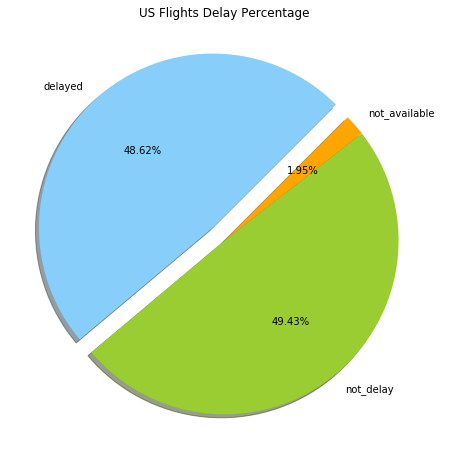

In [40]:
val1=df1_clean[df1_clean.arr_delay>0].shape[0]/df1_clean.shape[0]
val2=df1_clean[df1_clean.arr_delay<=0].shape[0]/df1_clean.shape[0]
val3=df1_clean[df1_clean.arr_delay.isnull()].shape[0]/df1_clean.shape[0]

value_list=[val1, val2, val3]
label_list=['delayed', 'not_delay', 'not_available']
color_list=['lightskyblue','yellowgreen', 'orange']
explode_list=[0.1, 0, 0]
plt.figure(figsize=(8, 8))
plt.pie(value_list, shadow=True, labels=label_list, startangle=45, autopct='%.2f%%', colors=color_list, explode=explode_list)
plt.title('US Flights Delay Percentage')
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

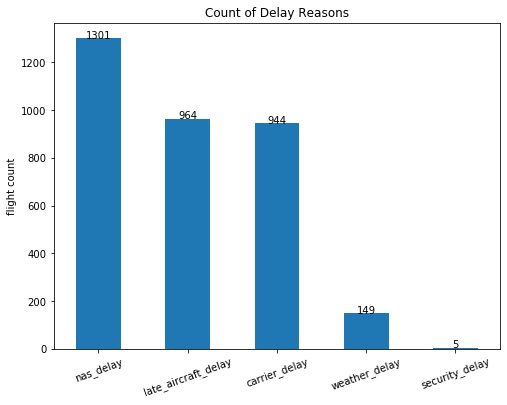

In [41]:
plt.figure(figsize=(8,6))
df1_clean.delay_cause.value_counts().plot(kind='bar')
plt.title('Count of Delay Reasons')
plt.ylabel('flight count')
plt.xticks(rotation=20)

locs, labels=plt.xticks()
counts=df1_clean.delay_cause.value_counts()
for loc, label in zip(locs, labels):
    count=counts[label.get_text()]
    plt.text(loc, count, count, ha='center', color='black' )

In [42]:
mask=df1_clean.arr_delay>0
delay_flight=df1_clean[mask]

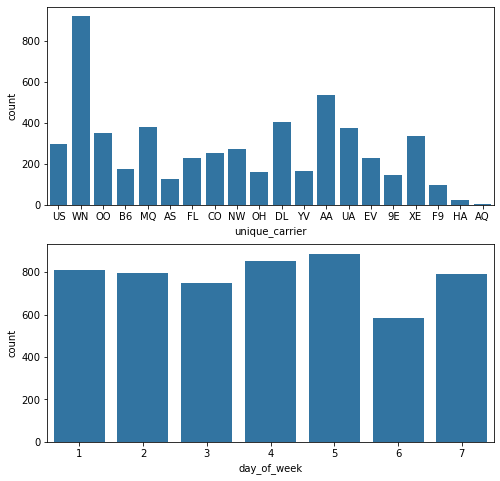

In [43]:
fig, ax = plt.subplots(nrows=2,figsize = [8,8])
default_color = sb.color_palette()[0]

sb.countplot(data = delay_flight, color=default_color,x = 'unique_carrier', ax = ax[0])
sb.countplot(data = delay_flight, color=default_color,x = 'day_of_week', ax = ax[1])

plt.show()

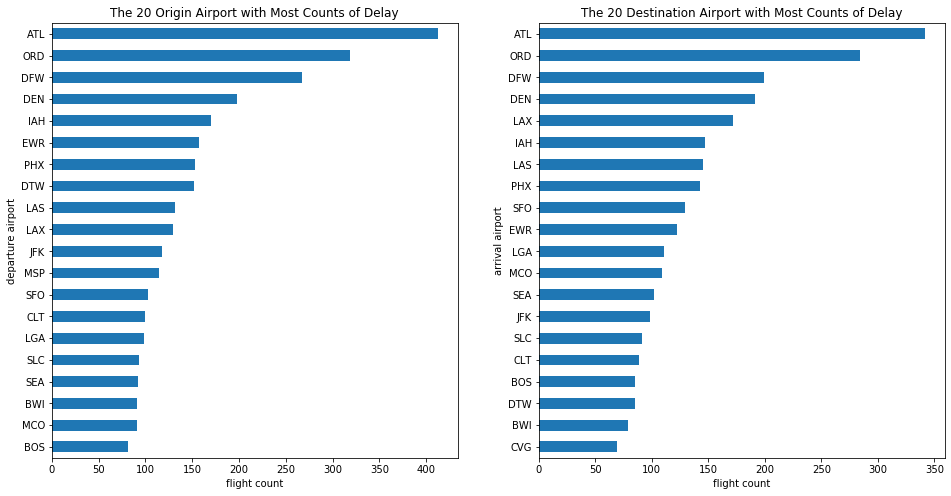

In [44]:
origin_20=delay_flight.origin.value_counts().sort_values(ascending=True).tail(20)
dest_20=delay_flight.dest.value_counts().sort_values(ascending=True).tail(20)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
origin_20.plot(kind='barh')
plt.title('The 20 Origin Airport with Most Counts of Delay')
plt.ylabel('departure airport')
plt.xlabel('flight count')

plt.subplot(1,2,2)
dest_20.plot(kind='barh')
plt.title('The 20 Destination Airport with Most Counts of Delay')
plt.ylabel('arrival airport')
plt.xlabel('flight count')

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The arrival delay variable is the variable of interest and the distribution of delay variable has a long tail to the right. So, I perform the log transform of the data. Under the transformation, the data shows unimodal distribution with one peak between 10 minutes and 30 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The features that I am interested in are the reasons, causes, locations and carriers that affect the time of delay. From the univariate charts above we can see that 
the nas_delay has the most count, and the security_delay has the least. The distribution of delay in carriers, day of the week are reasonable to me, and I believe the airports in the rank of most delays will have some connections with the causes. I think the causes of the delay should be in one column, after melt the five columns and cleaned some data type quality issues, the data is clean and tidy. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [45]:
df1_clean.describe().columns

Index(['actual_elapsed_time', 's_elapsed_time', 'arr_delay', 'dep_delay',
       'total_delay', 'delay_minute'],
      dtype='object')

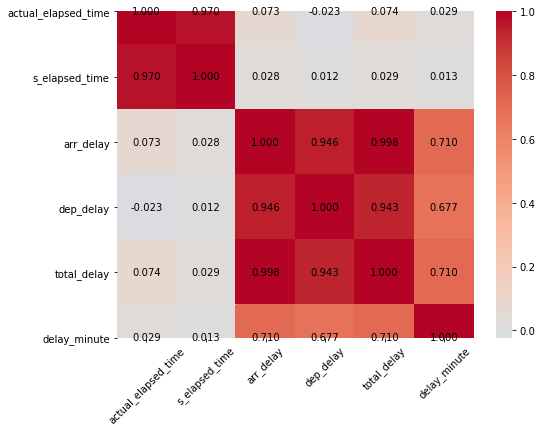

In [46]:
numeric_vars = ['actual_elapsed_time', 's_elapsed_time', 'arr_delay', 'dep_delay','total_delay', 'delay_minute']
# correlation plot
plt.figure(figsize = [8, 6])
sb.heatmap(delay_flight.corr(), annot = True, fmt = '0.3f',cmap = 'coolwarm', center=0,annot_kws={'color': 'black'})
plt.xticks(rotation = 45)
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


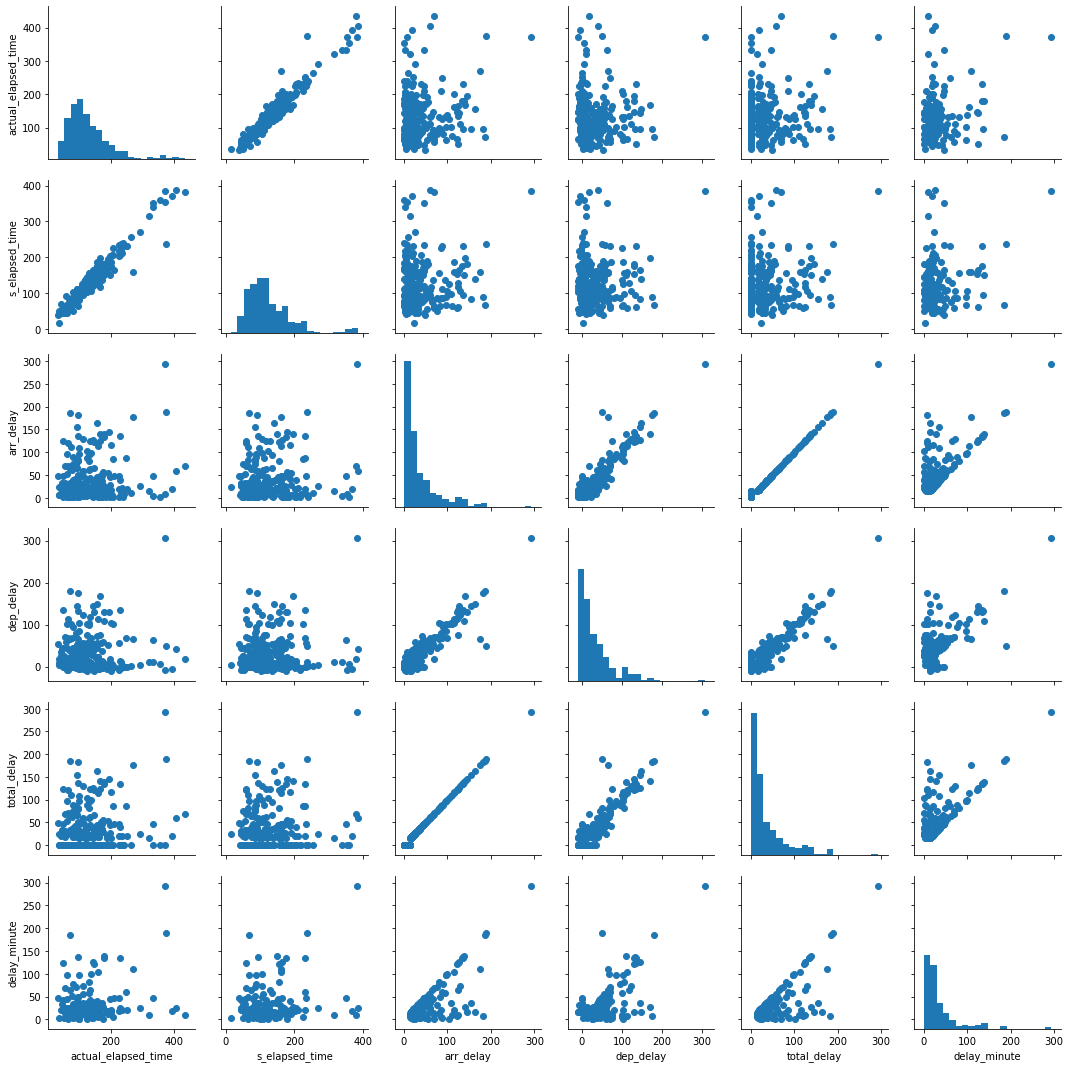

In [47]:
samples = np.random.choice(delay_flight.shape[0], 500, replace = False)
df1_samp = delay_flight.loc[samples,:]

g = sb.PairGrid(data = df1_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The heat map of correlation shows that the stronger correlation, the darker color in the map above, and the diagonal is the correlation with the variable itself. actual elapsed time has strong positive correlation with scheduled elapsed time, arrival delay, departure delay and total delay are highly correlated with each other.The scatter-histogram plot also show the same features which are meet our expectations 

**delay_minute column need delete**

In [48]:
delay_flight.head()

,index,year,month,day_of_month,day_of_week,unique_carrier,flight_num,actual_elapsed_time,s_elapsed_time,arr_delay,...,dest,cancelled,diverted,depart_time,arrive_time,schedule_dep_time,schedule_arr_time,total_delay,delay_cause,delay_minute
0,0,2008,8,27,3,US,1548,278.0,296.0,3.0,...,CLT,0,0,11:21,18:59,11:00,18:56,0.0,NaN,NaN
5,5,2008,8,17,7,WN,2315,80.0,75.0,11.0,...,LAS,0,0,11:11,12:31,11:05,12:20,0.0,NaN,NaN
12,12,2008,9,25,4,OO,3938,103.0,97.0,2.0,...,COS,0,0,13:43,15:26,13:47,15:24,0.0,NaN,NaN
14,14,2008,7,20,7,B6,1073,93.0,87.0,2.0,...,RIC,0,0,07:46,09:19,07:50,09:17,0.0,NaN,NaN
15,15,2008,1,23,3,B6,353,389.0,371.0,18.0,...,BUR,0,0,09:20,12:49,09:20,12:31,18.0,nas_delay,18.0


Text(0, 0.5, 'total_delay(in min)')

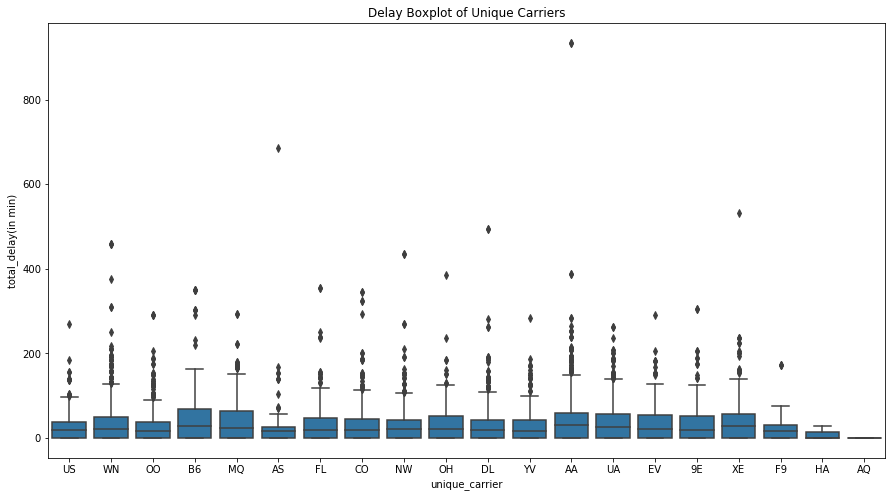

In [49]:
plt.figure(figsize=(15,8))
base_color = sb.color_palette()[0]
sb.boxplot(data = delay_flight, x = 'unique_carrier',  y = 'total_delay',color = base_color)
plt.title('Delay Boxplot of Unique Carriers')
plt.ylabel('total_delay(in min)')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1440x720 with 0 Axes>

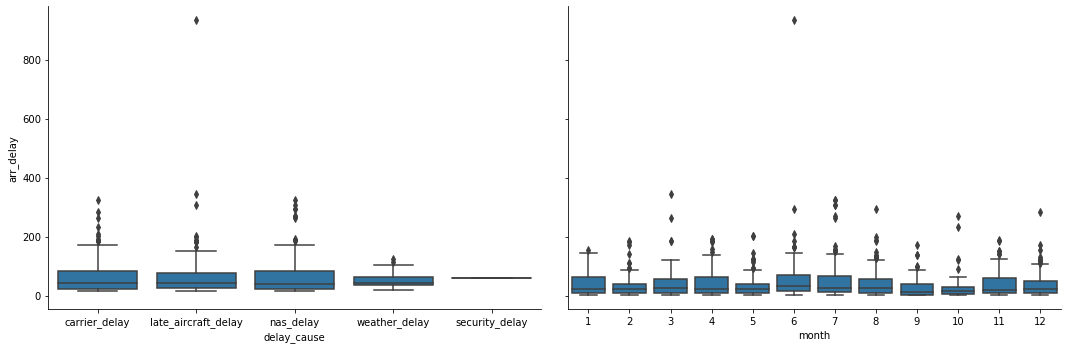

In [50]:

samples = np.random.choice(delay_flight.shape[0], 2000, replace = False)
flight_samp = delay_flight.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = flight_samp, y_vars = ['arr_delay'], x_vars = ['delay_cause','month'],
                size = 5,aspect=1.5)
g.map(boxgrid)
plt.show();

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


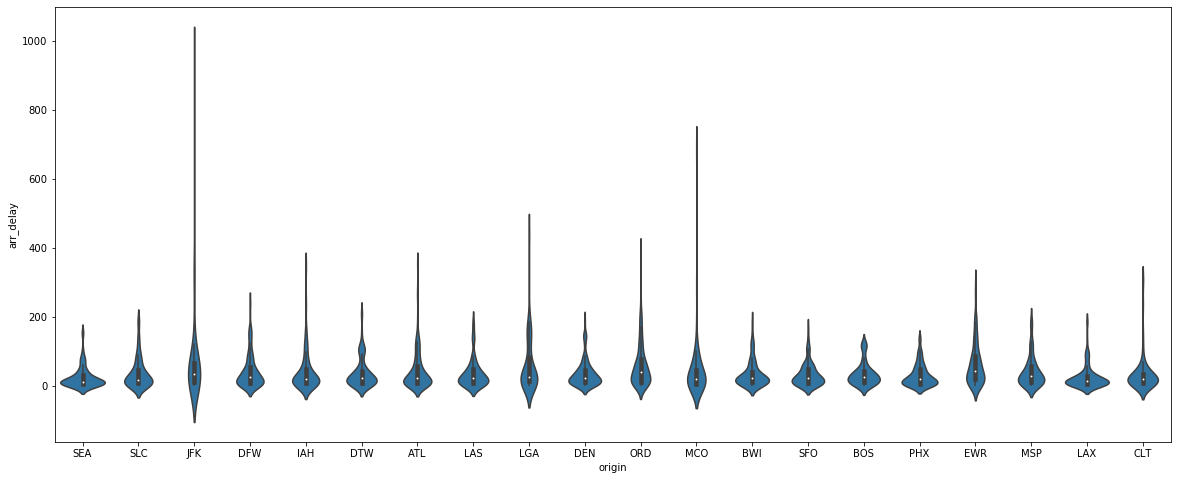

In [51]:
list=origin_20.index
origin_list=delay_flight.query('origin in list')
plt.figure(figsize=(20,8))
base_color = sb.color_palette()[0]
sb.violinplot(data = origin_list, x = 'origin', y = 'arr_delay', color = base_color)

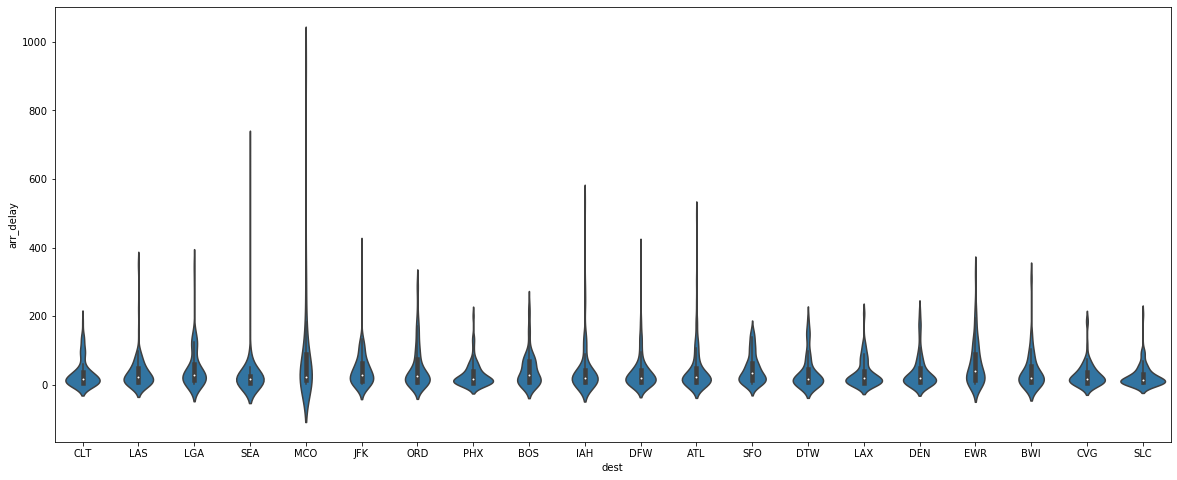

In [52]:
list=dest_20.index
dest_list=delay_flight.query('dest in list')
plt.figure(figsize=(20,8))
base_color = sb.color_palette()[0]
sb.violinplot(data = dest_list, x = 'dest', y = 'arr_delay', color = base_color)

In [53]:
delay_trans=delay_flight.groupby('month')['delay_cause'].value_counts()
delay_trans=pd.DataFrame(delay_trans, index=None)
delay_trans.columns=['count']
delay_trans.reset_index(inplace=True)

In [54]:
delay_trans=delay_trans.pivot(index='month', columns='delay_cause', values='count').reset_index().rename_axis(None, axis=1)
delay_trans

,month,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
0,1,96.0,81.0,126.0,1.0,13.0
1,2,82.0,105.0,120.0,NaN,17.0
2,3,103.0,104.0,152.0,1.0,21.0
3,4,68.0,77.0,116.0,NaN,5.0
4,5,69.0,78.0,112.0,NaN,13.0
5,6,102.0,106.0,145.0,2.0,22.0
6,7,69.0,86.0,125.0,NaN,20.0
7,8,98.0,85.0,98.0,1.0,10.0
8,9,48.0,37.0,48.0,NaN,2.0
9,10,47.0,41.0,60.0,NaN,3.0


In [55]:
norm_carrier = (delay_trans['carrier_delay'] - delay_trans['carrier_delay'].min()) / (delay_trans['carrier_delay'].max() - delay_trans['carrier_delay'].min())

# normalize Argentina data
norm_weather = (delay_trans['weather_delay'] - delay_trans['weather_delay'].min()) / (delay_trans['weather_delay'].max() - delay_trans['weather_delay'].min())



In [56]:
delay_trans['month']=delay_trans['month'].astype(int)

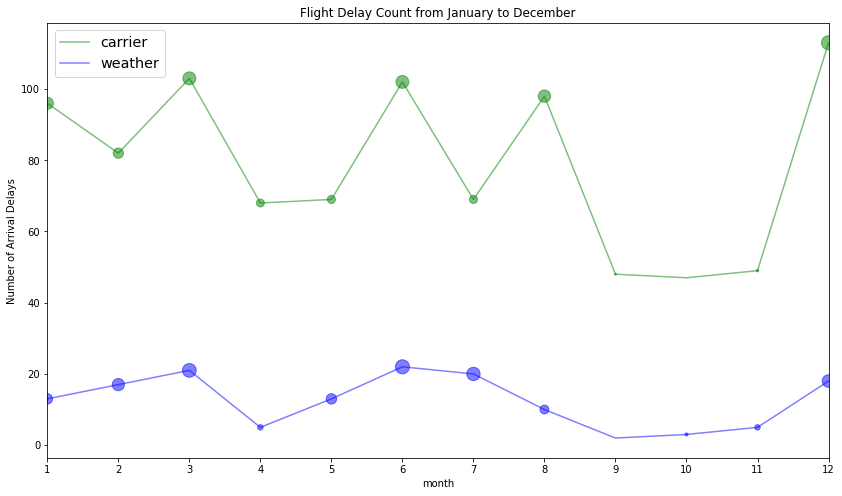

In [67]:
ax0 = delay_trans.plot(kind='scatter',x='month', y='carrier_delay',figsize=(14, 8), alpha=0.5, color='green',s=norm_carrier * 200,
                       xticks=np.arange(0,13,1))
ax1 = delay_trans.plot(kind='scatter',x='month',y='weather_delay',alpha=0.5,color="blue",s=norm_weather * 200,ax = ax0)
ax2 = delay_trans.plot(kind='line',x='month',y='carrier_delay',alpha=0.5,color="green",ax = ax0)
ax3 = delay_trans.plot(kind='line',x='month',y='weather_delay',alpha=0.5,color="blue",ax = ax0)

ax0.set_ylabel('Number of Arrival Delays')
ax0.set_title('Flight Delay Count from January to December')
ax0.legend(['carrier', 'weather'], loc='upper left', fontsize='x-large')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
delay_flight.delay_cause.value_counts().index

In [ ]:
cat_markers = [['carrier_delay', 'o'],
               ['nas_delay', 's'], 
               ['late_aircraft_delay', '^'],
               ['weather_delay', '.'], 
               ['security_delay', '*']
              ]

for cat, marker in cat_markers:
    df_cat = delay_flight[delay_flight['delay_cause'] == cat]
    plt.scatter(data = df_cat, x = 'arr_delay', y = 'total_delay', marker = marker)
plt.legend(['carrier','nas', 'late_aircraft', 'weather', 'security'])

In [ ]:
delay_flight.info()

In [ ]:
delay_flight.head()

In [ ]:
trans_columns=['nas_delay', 'late_aircraft_delay', 'carrier_delay', 'weather_delay',
       'security_delay']


In [ ]:
# a=[2000, 2001,2002, 2003]
# b=['a', 'b', 'c', 'd']
# ziplist=list(zip(a,b))
# c=pd.DataFrame(ziplist, columns=['cat', 'num'], index=[0,1,2,3])
# c


listOfNames =  ['jack', 'Riti', 'Aadi']
listOfAge   =  [34, 30, 16]
listOfCity  =  ['Sydney', 'Delhi', 'New york']
dfObj = pd.DataFrame(listOfNames, listOfAge, listOfCity)

In [ ]:
import numpy as np

a = np.array([(1,2,3), (4,5,6)])

b = a.transpose()

In [ ]:
a

In [ ]:
b

### Explanatory

Document your Story,In your readme document, you should summarize your main findings and reflect on the steps you took in your data exploration. You should also lay out the key insights that you want to convey in your explanatory report as well as any changes to visualizations, or note new visualizations that will be created to bridge between your insights.



Create your Slide Deck,Follow the plans you laid out in the previous step and create a slide deck with explanatory data visualizations to tell a story about the data you explored. You can start with code that you used in your exploration, but you should make sure that the code is revised so that your plots are polished. Make sure that you also pay attention to aspects of design integrity in your revisions


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

### (Optional) Get Feedback
- What do you notice about each visualization?
- What questions do you have about the data?
- What relationships do you notice?
- What do you think is the main takeaway from the slide deck?
- Is there anything that you don’t understand from the plots?
